# Descriptive statistics

We will start by looking at how we can describe data using summary statistics

## Types of data

![data_types.png](images/data_types.png)


Data can be quantitative or qualitative as summarized in this table, and they can be described in the following ways
- `qualitative`
  - frequency
  - proportion
- `quantitative`
  - measures of centrality (mean/median)
  - measures of spread (range/IQR/variance/SD)

---
## Describing qualitative/categorical data 
![data_qualitative.png](images/data_qualitative.png)

Categorical data can be summarized as counts of each category as well as their proportions

To illustrate this, we will generate some categorical data and use it to calculate the count and proportions of each category

In [1]:
library(tidyverse)

data_categorical <- tibble(Sex=c("M","F","M","M","F","M"),
                           Diagnosis=c("DM","DM","HPT","HPT","Asthma","IHD"))


data_categorical <- data_categorical %>%
                    mutate(Sex = as.factor(Sex),
                           Diagnosis = as.factor(Diagnosis))

head(data_categorical)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Sex,Diagnosis
<fct>,<fct>
M,DM
F,DM
M,HPT
M,HPT
F,Asthma
M,IHD


We can use the `table` function to obtain the counts of the different categories for a variable

In [2]:
table(data_categorical$Sex)


F M 
2 4 

We can calculate the percentage per category by passing the output of `table` to the `prop.table` function that returns the fraction per category. We then multiply it by 100 to get the percentage

$$
\text{Proportion} = \frac{\text{Count per category}}{\sum \text{All categories}} \times 100
$$

In [3]:
table(data_categorical$Sex) %>% prop.table * 100


       F        M 
33.33333 66.66667 

---
## Describing quantitative data
![data_quantitative.png](images/data_quantitative.png)

### Data preparation

Let us generate some quantitative data with different distributions to illustrate how they can be described with different measures of centrality and spread

In [4]:
sample1 <- tibble(set=1, n=1:1000, value=rbeta(1000, 100,100)*200+50)
sample2 <- tibble(set=2, n=1:1000, value=rbeta(1000, 1,50)*400+130)
sample3 <- tibble(set=3, n=1:1000, value=rbeta(1000, 50,1)*400-230)
sample4 <- tibble(set=4, n=1:1000, value=rbeta(1000, 0.6,0.6)*50+120)

data <- bind_rows(sample1, sample2, sample3, sample4) %>%
        mutate(set = as.factor(set))

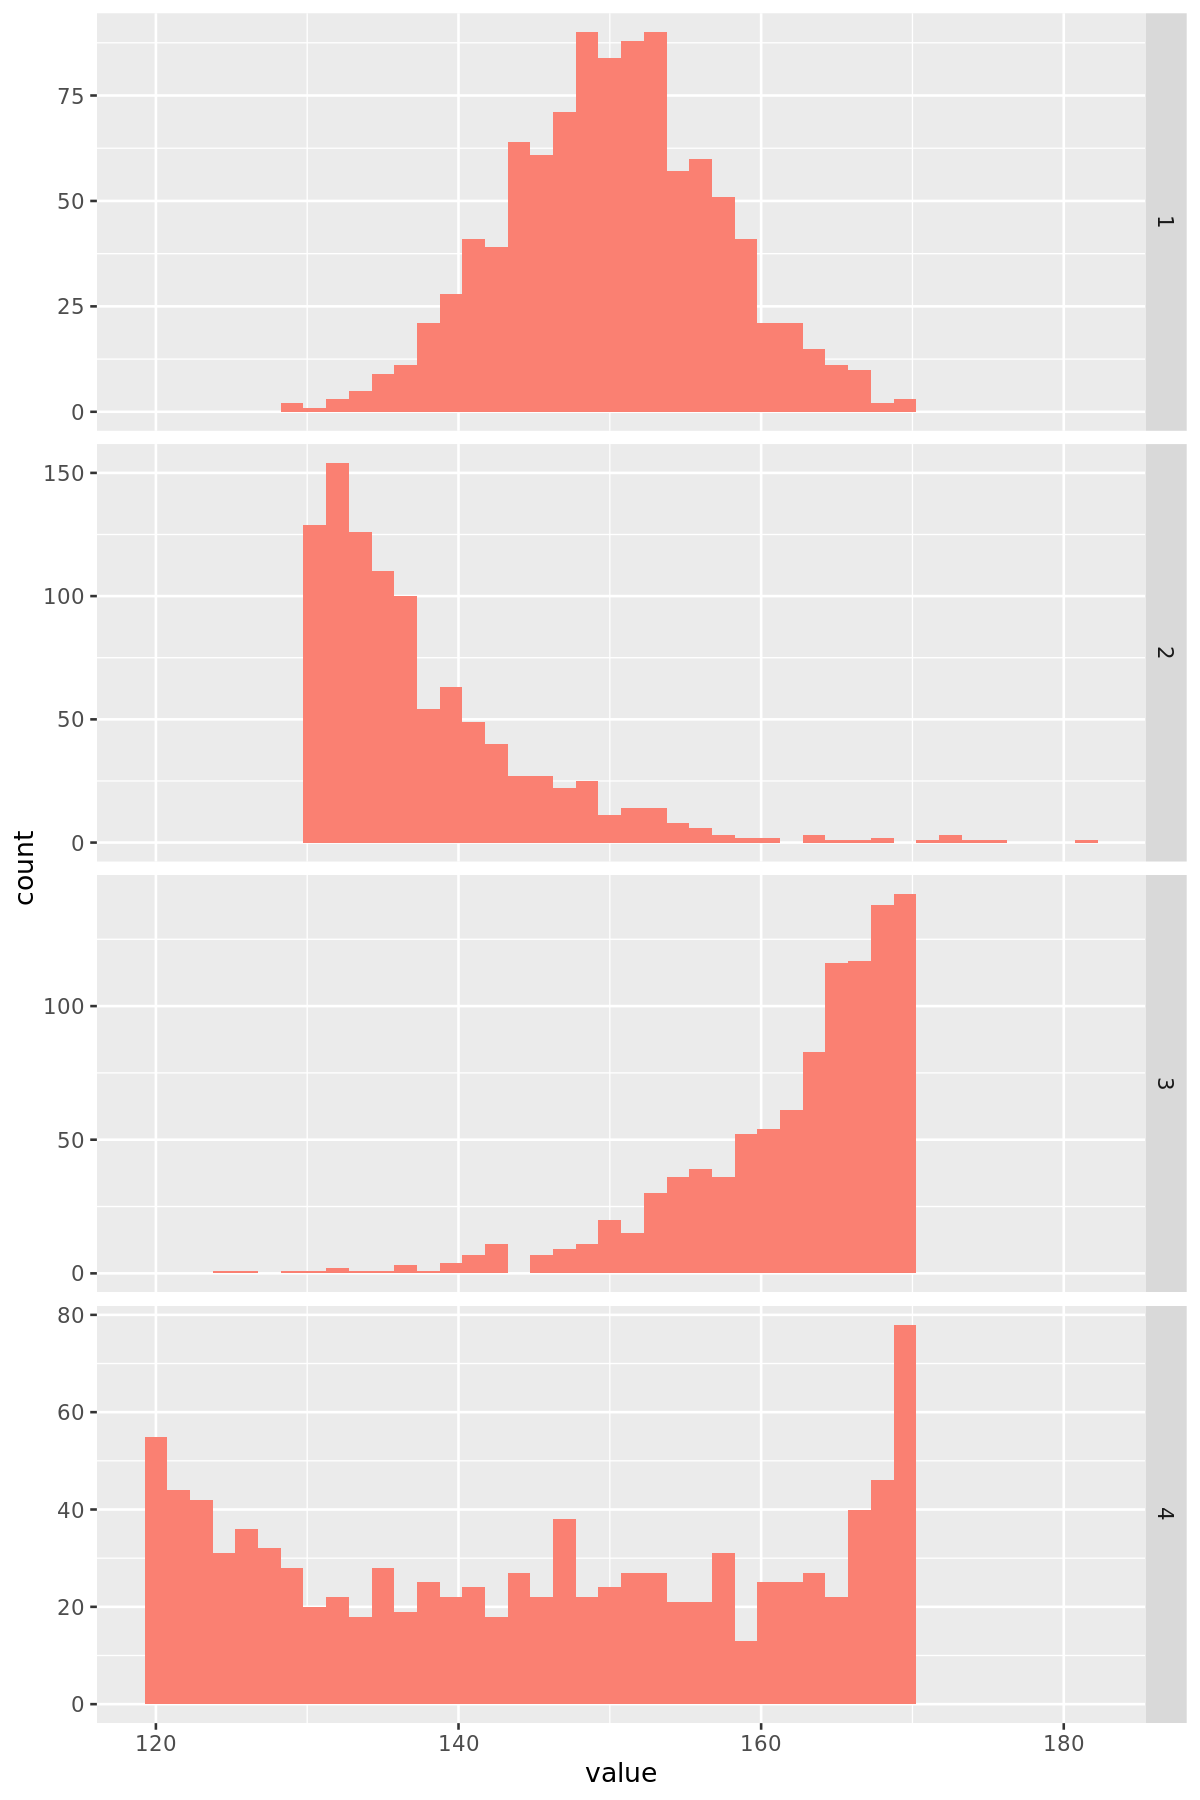

In [5]:
# set plot dimensions
options(repr.plot.width=10, repr.plot.height=15)

data %>% 
group_by(set) %>%
ggplot(aes(x=value)) +
  geom_histogram(binwidth=1.5, fill="salmon") +
  facet_grid(set ~., scale="free_y") + # allow different y-scales
  theme_grey(base_size = 16)

---
### Measures of centrality

There are 2 commonly used measures of centrality

- Mean
- Median

#### 1. Mean

![data_mean.png](images/data_mean.png)

We can use the base function `mean` to calculate the average

In [6]:
values <- c(1,5,2,3,2,6,2)

mean(values)

[1] 3

Let us calculate the means of the different datasets (1-4) and visualize the distributions with their means

In [7]:
# calculate means of the datasets grouped by the set category

mean_stat <- data %>% 
             group_by(set) %>%
             summarize(mean=mean(value))

mean_stat

set,mean
<fct>,<dbl>
1,150.1803
2,137.6575
3,162.1475
4,144.9446


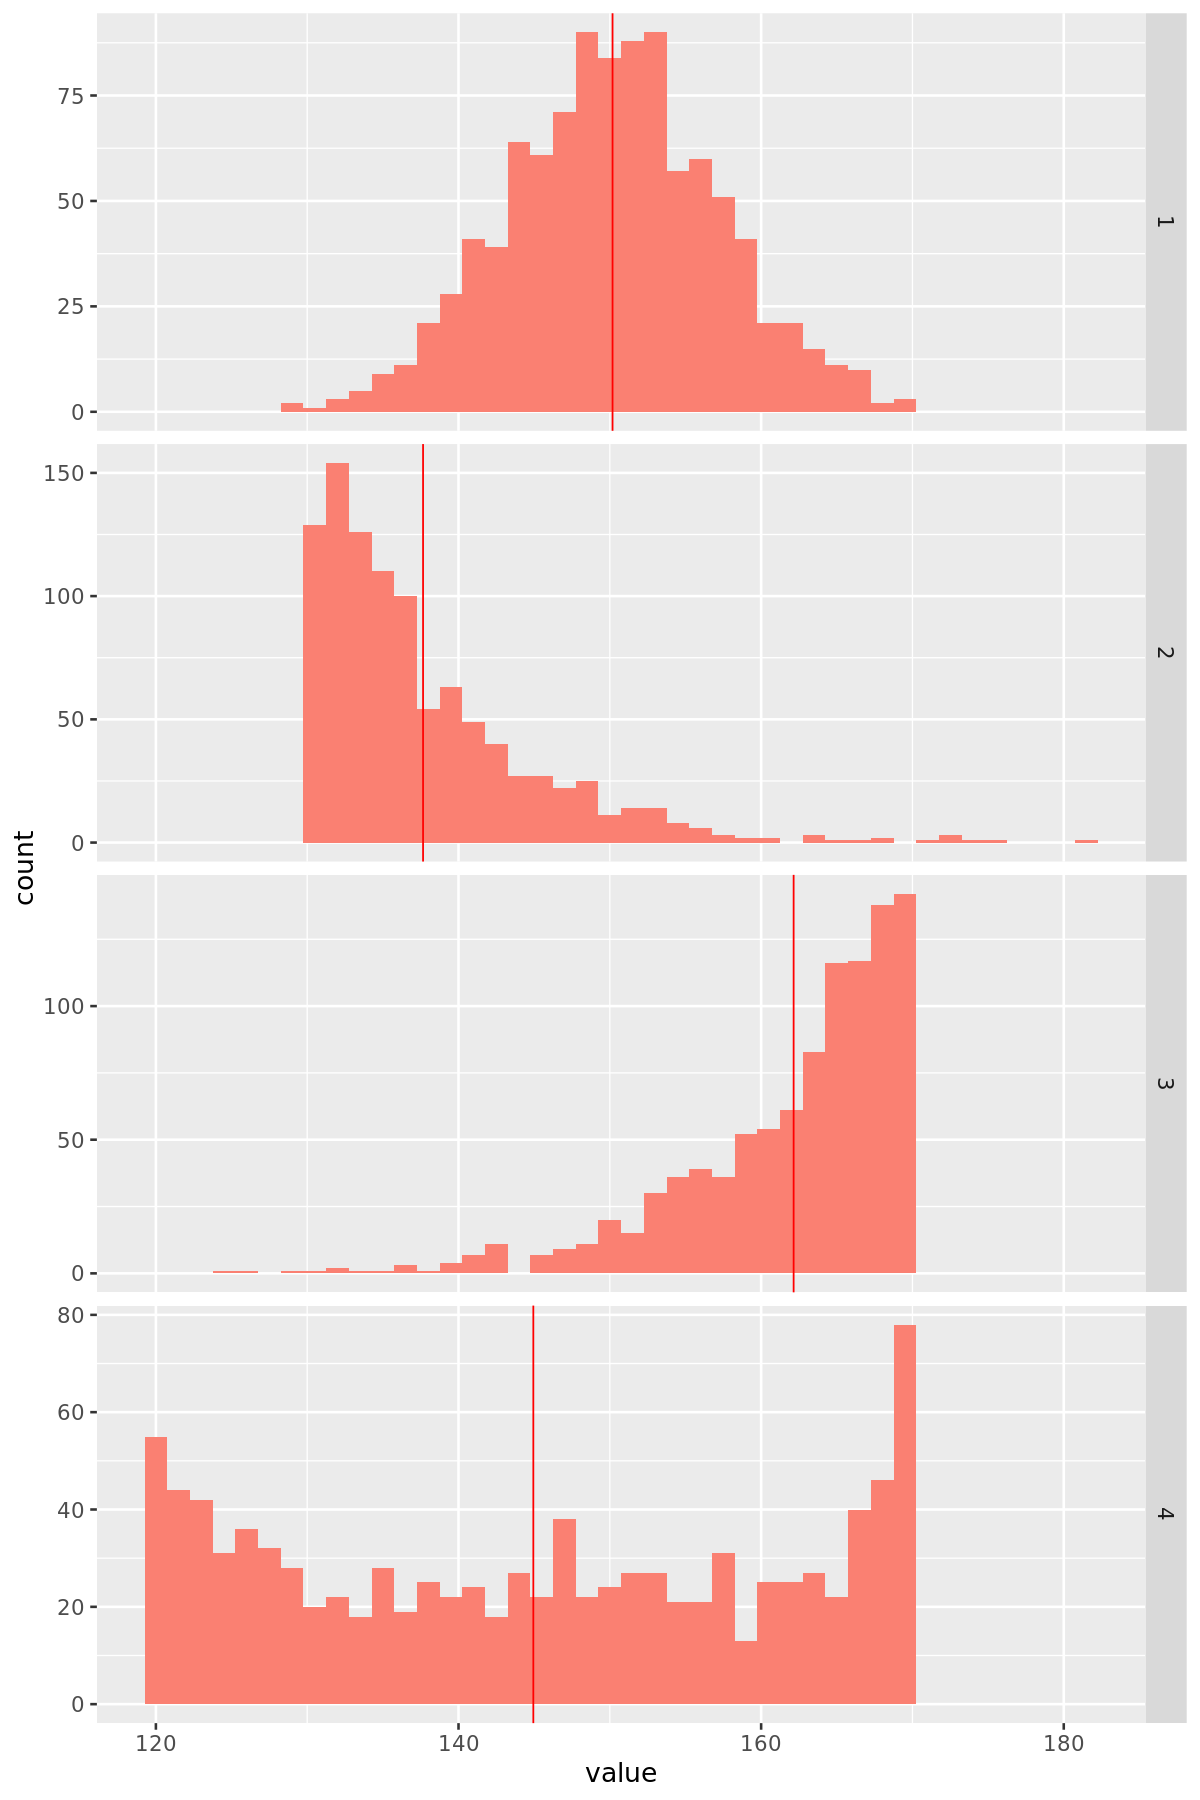

In [8]:
# set plot dimensions
options(repr.plot.width=10, repr.plot.height=15)

# plot histograms grouped by set with their calculated means
data %>% 
group_by(set) %>%
ggplot(aes(x=value)) +
  geom_histogram(binwidth=1.5, fill="salmon") +
  geom_vline(data=mean_stat, aes(xintercept=mean,group=set),color="red") +
  facet_grid(set ~., scale="free_y") + # allow different y-scales
  theme_grey(base_size = 16)

#### 2. Median

![data_median.png](images/data_median.png)

The median is the middle (50% percentile) value when the values are sorted

We can use the ```quantile``` function to calculate the 50% percentile (middle) value
- `quantile(data, percentile)`

In [9]:
values <- c(1,5,2,3,2,6,2)

# calculate 50% (0.5) percentile
quantile(values, 0.5)

50% 
  2

The is equivalent to the ```median``` function (50% percentile)

In [10]:
median(values)

[1] 2

Let us calculate the medians of the different datasets (1-4) and visualize the distributions with their medians

In [11]:
median_stat <- data %>% 
               group_by(set) %>%
               summarize(median=median(value))

median_stat

set,median
<fct>,<dbl>
1,150.2207
2,135.4191
3,164.4917
4,145.2844


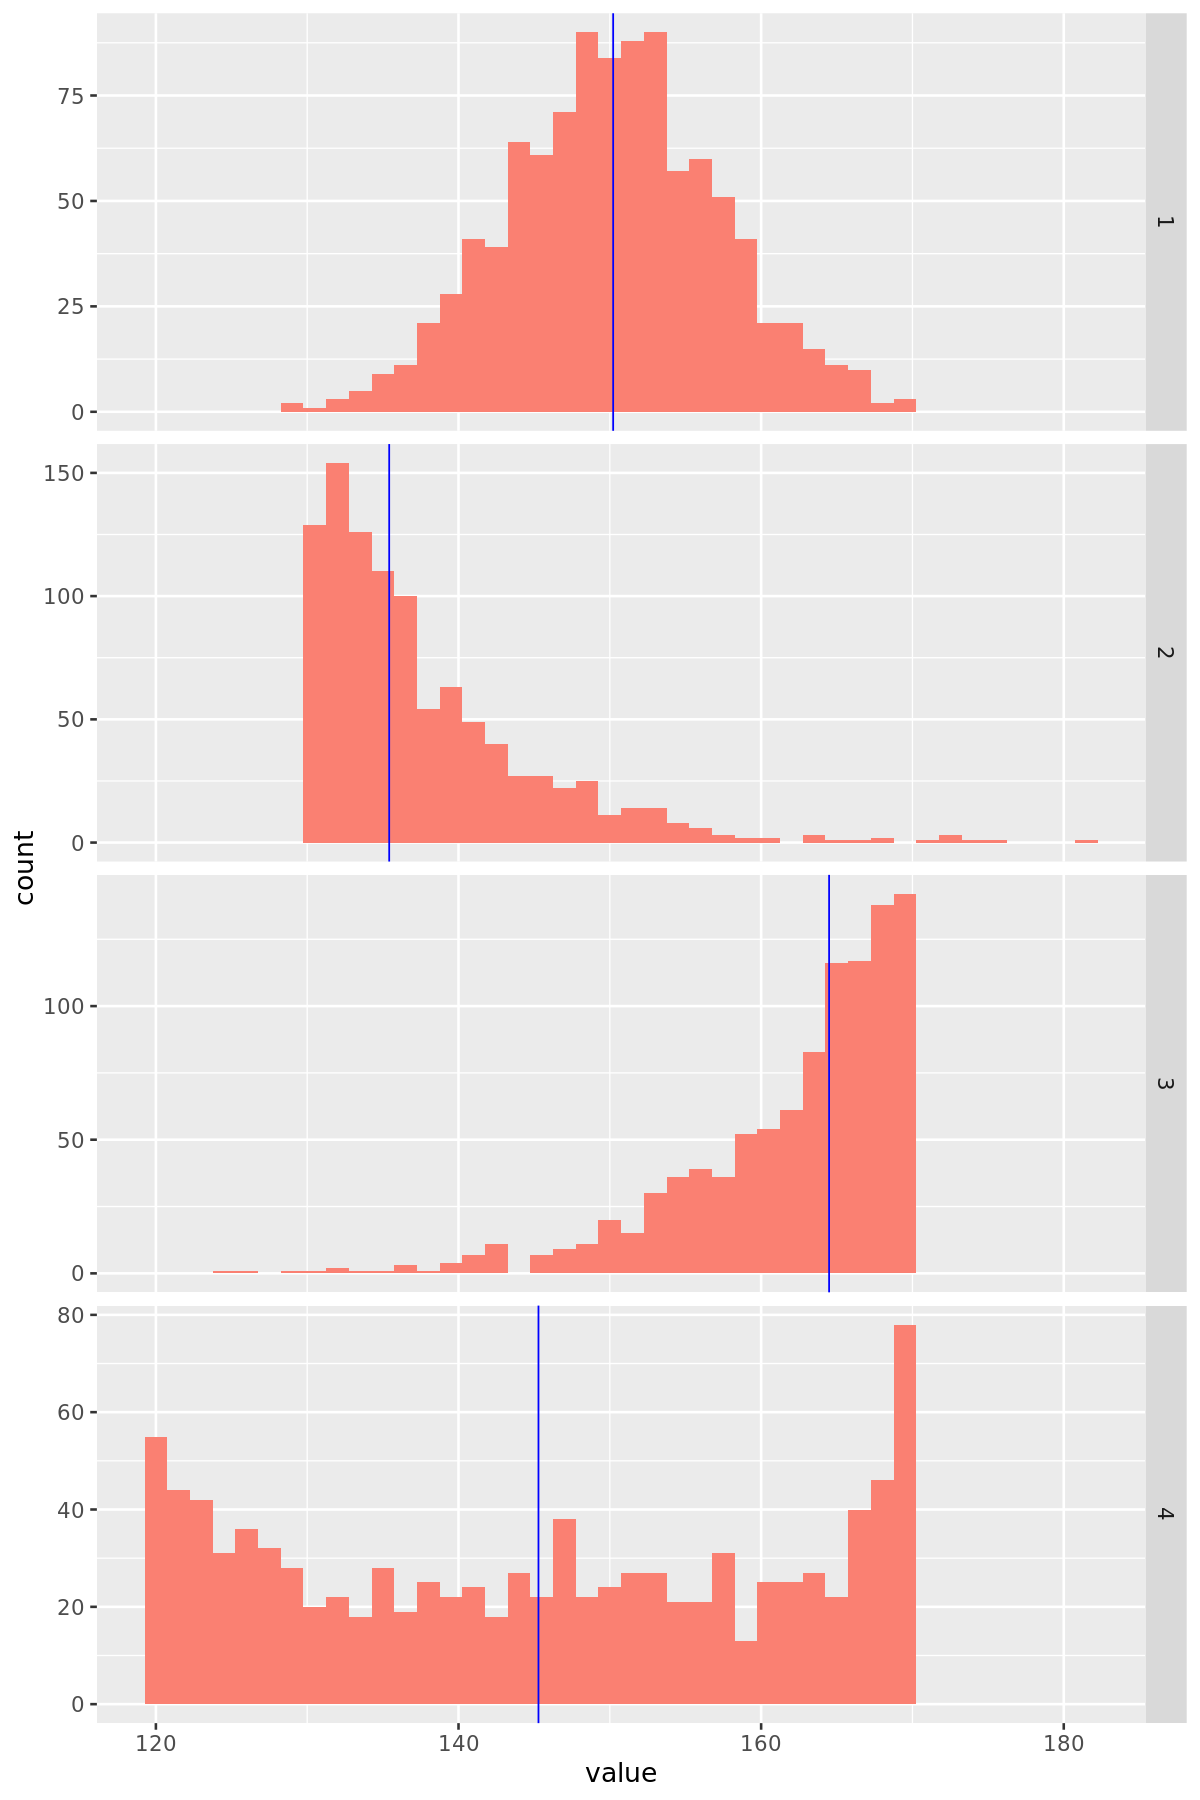

In [12]:
# set plot dimensions
options(repr.plot.width=10, repr.plot.height=15)

# plot histograms grouped by set with their calculated medians
data %>% 
group_by(set) %>%
ggplot(aes(x=value)) +
  geom_histogram(binwidth=1.5, fill="salmon") +
  geom_vline(data=median_stat, aes(xintercept=median,group=set),color="blue") +
  facet_grid(set ~., scale="free_y") + # allow different y-scales
  theme_grey(base_size = 16)

#### Comparing mean and median with different distributions

Given the both mean and median are both measures of centrality, let us examine how they differ with different distributions
- We calculate the `mean`, `median` and their `difference` by the group `set` 
- We plot the histograms grouped by `set` with their means and medians

In [13]:
summary_stat <- data %>% 
                group_by(set) %>%
                summarize(mean=mean(value), 
                          median=median(value), 
                          diff=mean-median)

summary_stat

set,mean,median,diff
<fct>,<dbl>,<dbl>,<dbl>
1,150.1803,150.2207,-0.04043645
2,137.6575,135.4191,2.23840599
3,162.1475,164.4917,-2.34418206
4,144.9446,145.2844,-0.33978621


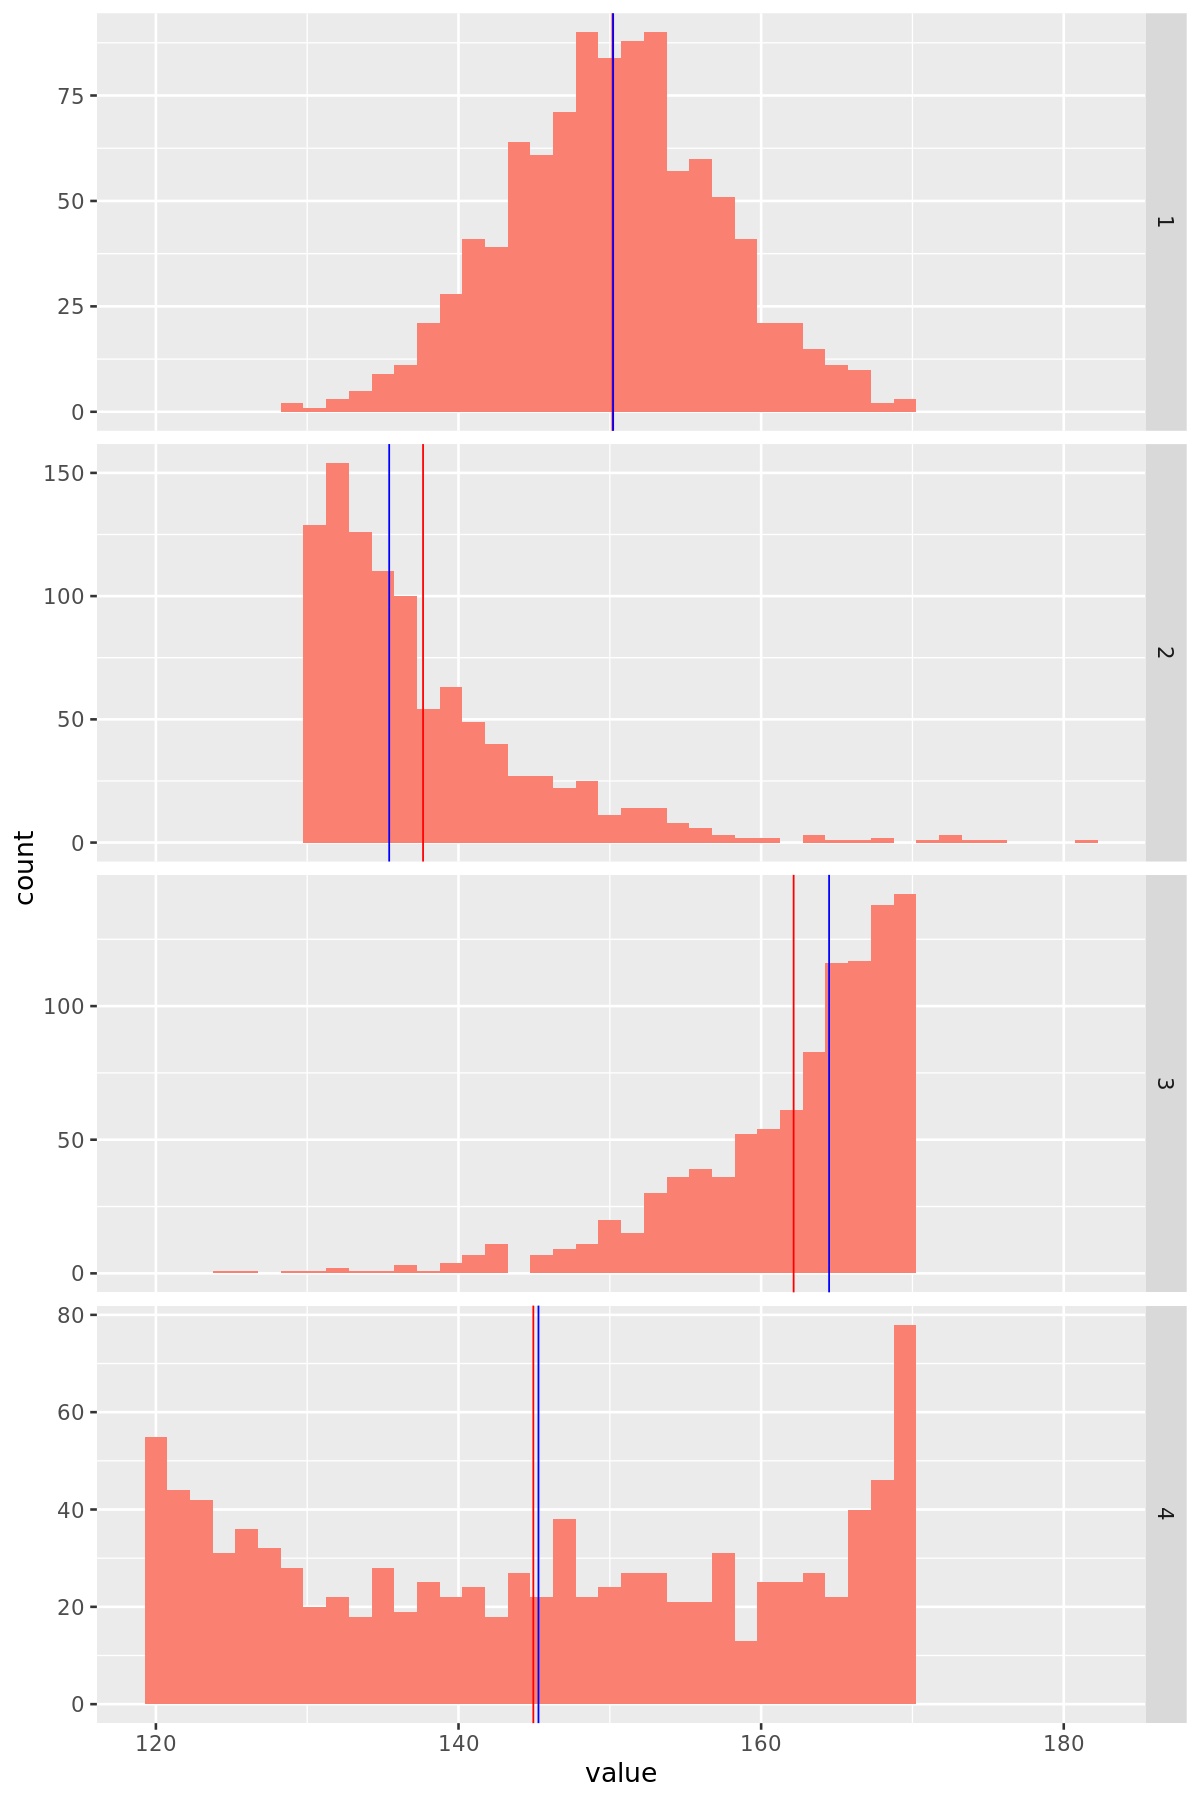

In [14]:
# set plot dimensions
options(repr.plot.width=10, repr.plot.height=15)

# plot histograms grouped by set with their calculated means and medians
data %>% 
group_by(set) %>%
ggplot(aes(x=value)) +
  geom_histogram(binwidth=1.5, fill="salmon") +
  geom_vline(data=summary_stat, aes(xintercept=mean,group=set),color="red") +
  geom_vline(data=summary_stat, aes(xintercept=median,group=set), color="blue") +
  facet_grid(set ~., scale="free_y") + # allow different y-scales
  theme_grey(base_size = 16)

Notice that mean is affected by the skew in the data. For skewed data, the median may be a better measure as it is less affected by extreme values

![data_mean_median.png](images/data_mean_median.png)

---
### Measures of variability

There are 3 common measures of variability or spread of data
- Range
- Interquantile range (IQR)
- Variance and standard Deviation (SD)

#### 1. Range

The range is the simplest, which is the minimum and maximum values in the dataset

![data_range.png](images/data_range.png)

We can use the `range` function to get both the minimum and maximum values as a vector

In [15]:
values <- c(1,5,2,3,2,6,2)

# find the range of values
range(values)

[1] 1 6

Let us examine `minimum` and `maximum` values of the different datasets (1-4) grouped by `set`

In [16]:
# minimum and maximum values of datasets grouped by set
range_stat <- data %>% 
              group_by(set) %>%
              summarize(min=min(value),
                        max=max(value))

range_stat

set,min,max
<fct>,<dbl>,<dbl>
1,129.3560,169.9860
2,130.0043,181.4485
3,124.2298,169.9981
4,120.0000,170.0000


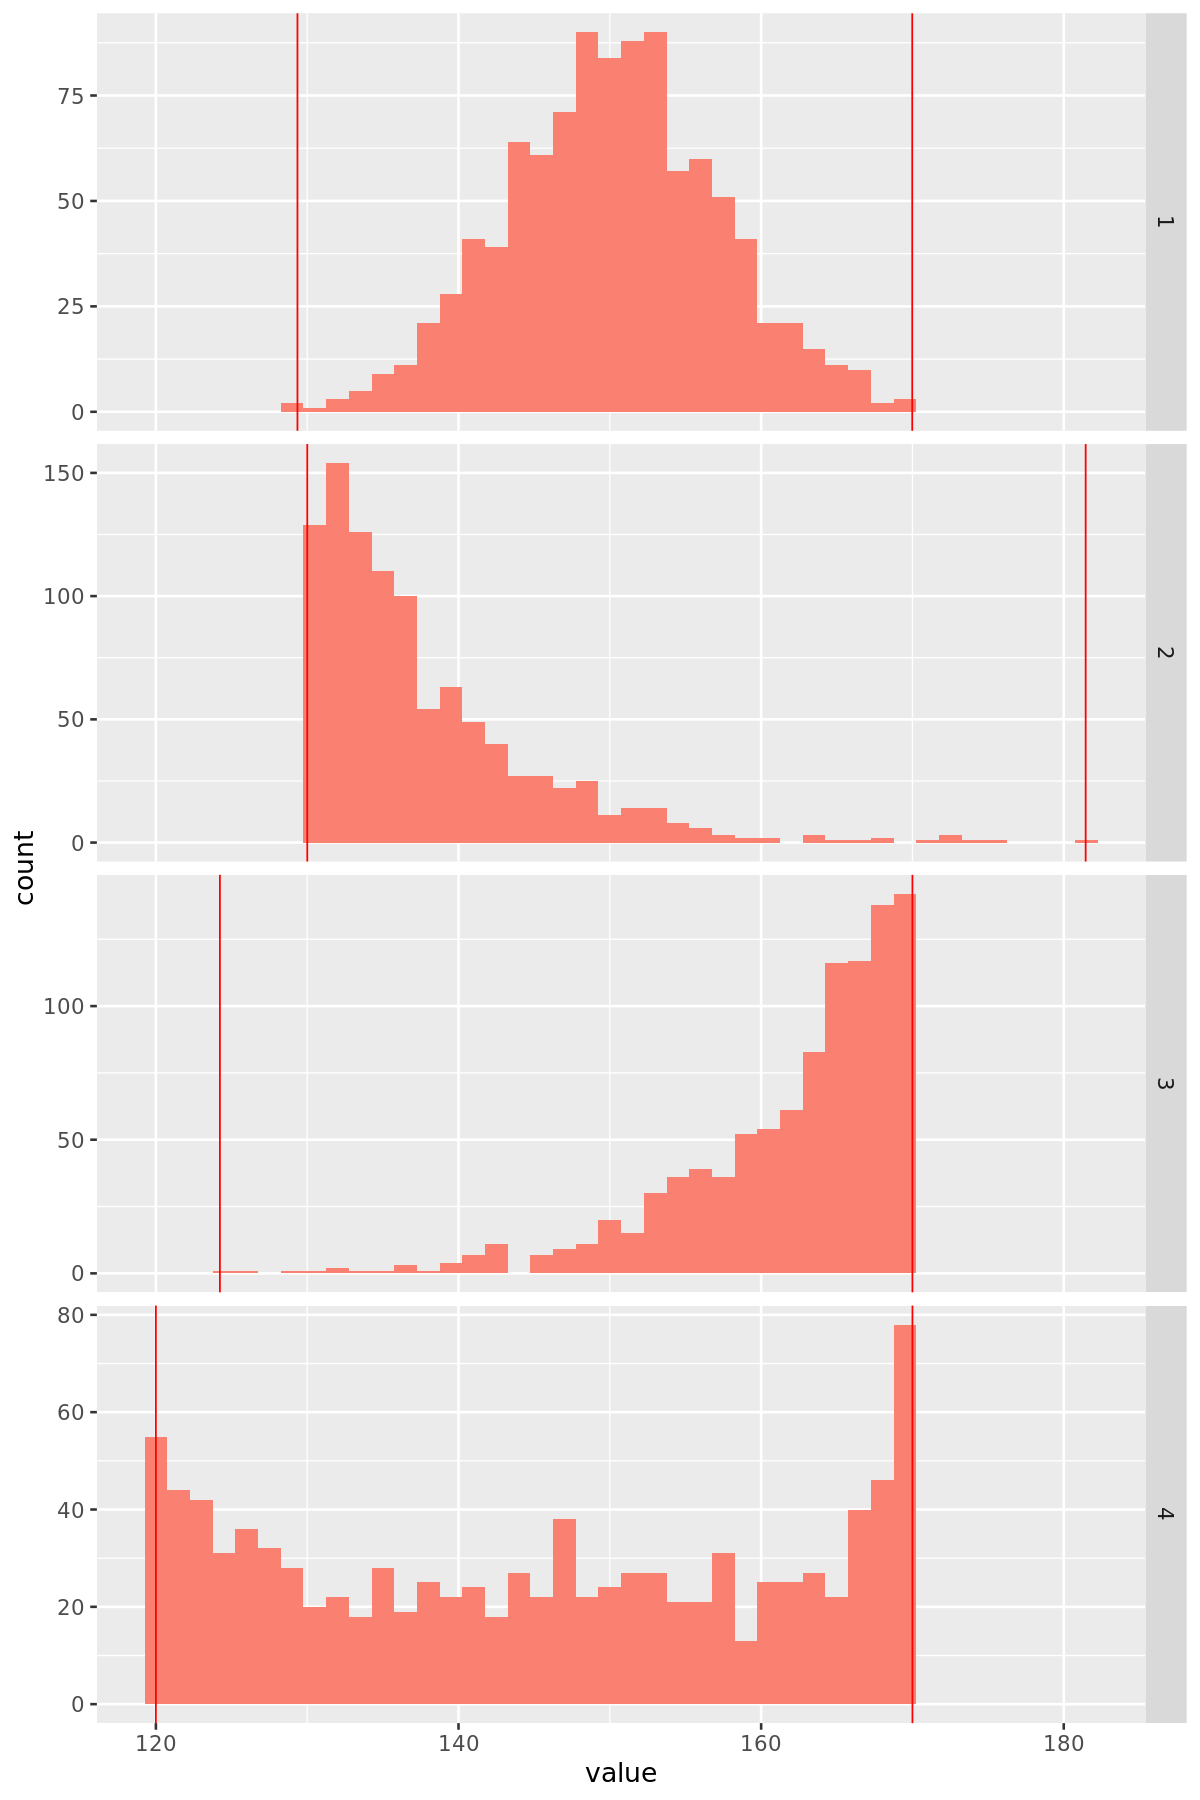

In [17]:
# set plot dimensions
options(repr.plot.width=10, repr.plot.height=15)

# plot histograms grouped by set with their minimum and maximum values
data %>% 
group_by(set) %>%
ggplot(aes(x=value)) +
  geom_histogram(binwidth=1.5, fill="salmon") +
  geom_vline(data=range_stat, aes(xintercept=min,group=set),color="red") +
  geom_vline(data=range_stat, aes(xintercept=max,group=set), color="red") +
  facet_grid(set ~., scale="free_y") + # allow different y-scales
  theme_grey(base_size = 16)

#### 2. Interquantile range (IQR)

The interquartile range is the difference between the 25th and 75th percentiles

![data_iqr.png](images/data_iqr.png)

We can use the `IQR` function to find the interquantile range

In [18]:
values <- c(1,5,2,3,2,6,2,6,2,7)

IQR(values)

[1] 3.75

We can examine the 25th/75th percentile and IQR values for the different distributions grouped by `set` and visualize the distributions with their percentiles

In [19]:
# Interquantile ranges for distributions grouped by set
IQR_stat <- data %>% 
            group_by(set) %>%
            summarize(percent_25 = quantile(value,0.25),
                      percent_75 = quantile(value,0.75),
                      IQR = IQR(value)
                     )
IQR_stat

set,percent_25,percent_75,IQR
<fct>,<dbl>,<dbl>,<dbl>
1,145.3786,154.9432,9.564646
2,132.3746,140.5806,8.205962
3,158.6807,167.5630,8.882360
4,129.0305,160.3456,31.315087


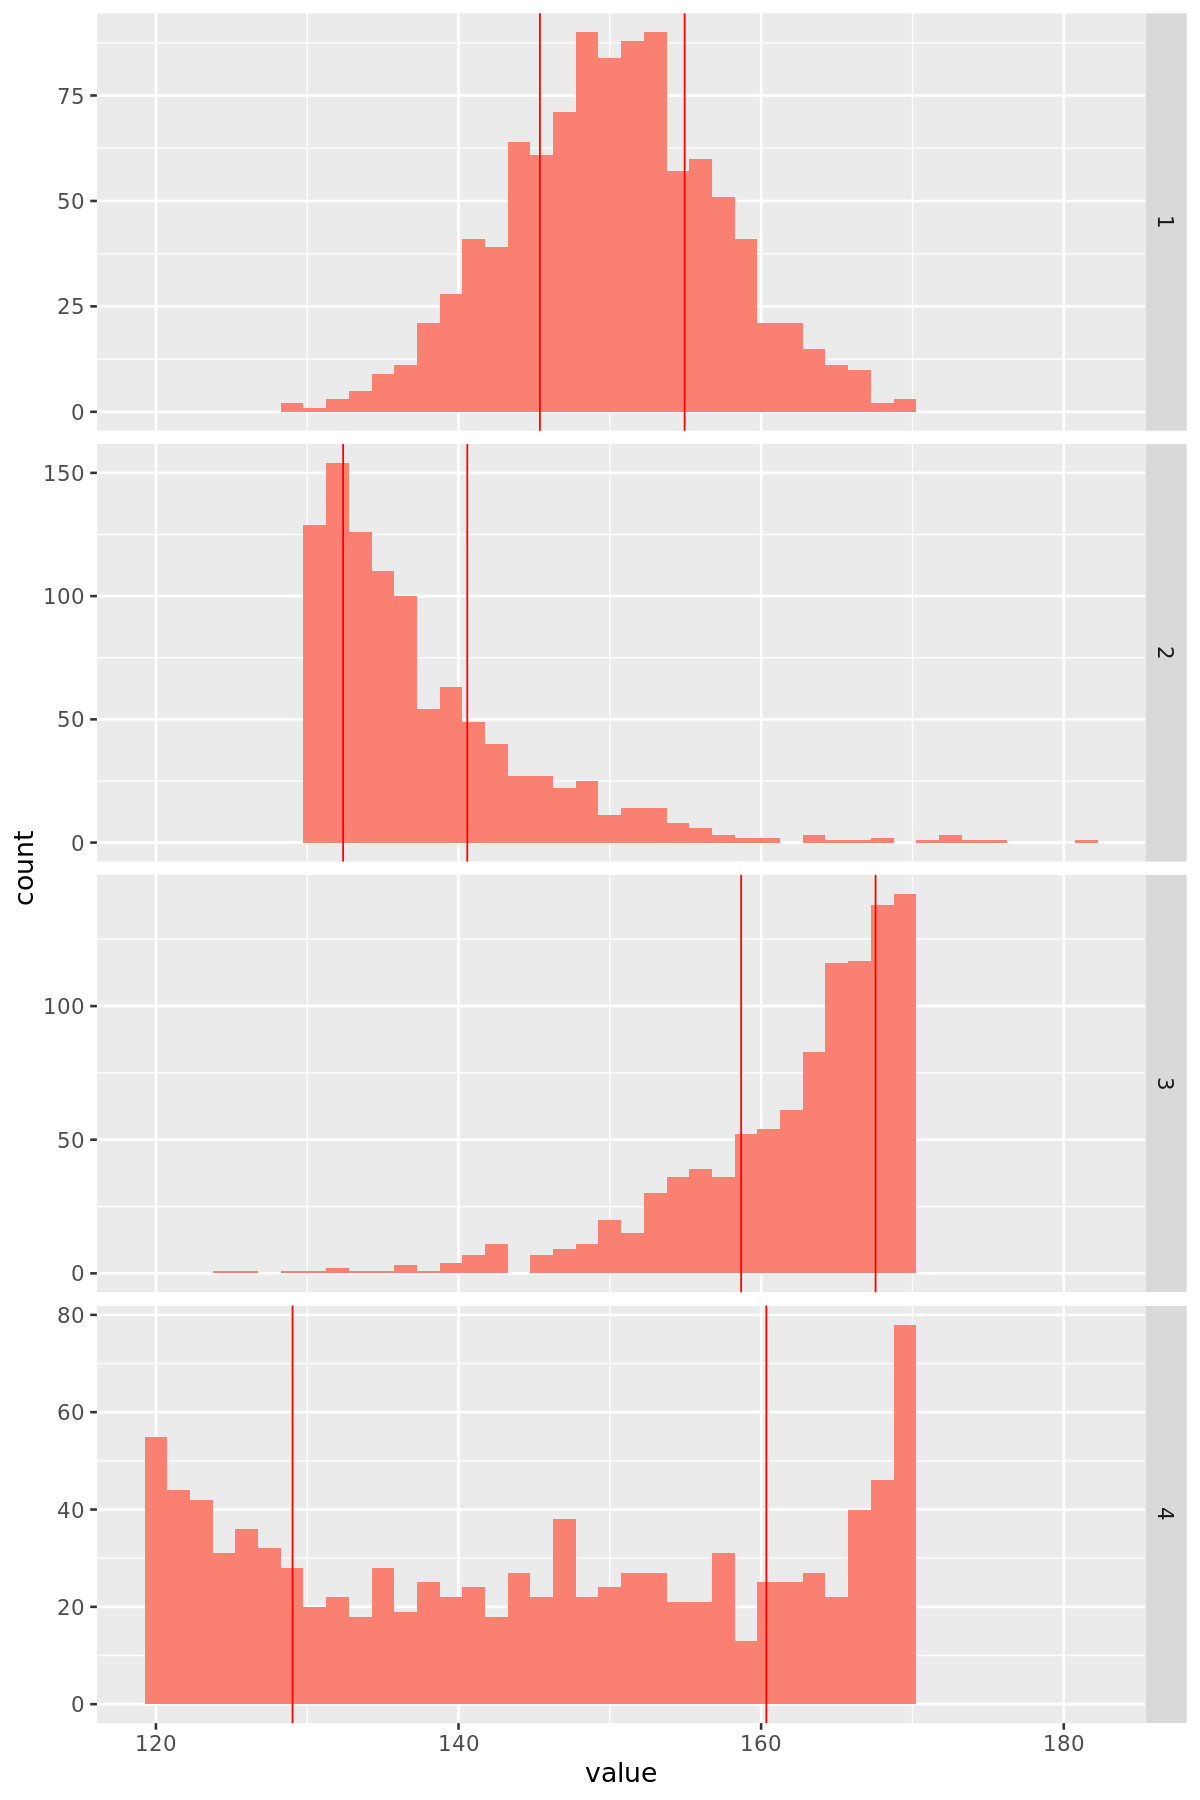

In [20]:
# set plot dimensions
options(repr.plot.width=10, repr.plot.height=15)

# histograms grouped by set with 25th and 75th percentile values
data %>% 
group_by(set) %>%
ggplot(aes(x=value)) +
  geom_histogram(binwidth=1.5, fill="salmon") +
  geom_vline(data=IQR_stat, aes(xintercept=percent_25,group=set),color="red") +
  geom_vline(data=IQR_stat, aes(xintercept=percent_75,group=set), color="red") +
  facet_grid(set ~., scale="free_y") + # allow different y-scales
  theme_grey(base_size = 16)

#### 3. Variance and standard deviation

The variance and standard deviation are the most commonly used measures of variability and spread of data
- `Variance` is defined as the sum of squared differences between the observed values and the mean, divided by the number of values
- `Standard deviation` is the square root of the variance

![data_variance_sd.png](images/data_variance_sd.png)

To illustrate how the variance is calculated, we first calculate the sum of squared differences with the following steps
- calculate the `mean` of values
- subtract the `mean` from each value to get the differences
- square the differences and sum them

In [21]:
values <- c(1,5,2,3,2,6,2,6,2,7)

mean <- mean(values)        # mean of values
diff_mean <- values-mean    # difference between each value and the mean
squares <- diff_mean^2      # squared differences
sum_squares <- sum(squares) # sum of squared differences

mean
diff_mean
squares
sum_squares

[1] 3.6

[1] -2.6  1.4 -1.6 -0.6 -1.6  2.4 -1.6  2.4 -1.6  3.4

[1]  6.76  1.96  2.56  0.36  2.56  5.76  2.56  5.76  2.56 11.56

[1] 42.4

To calculate the variance, we divide the sum of squared differences by the number of values. To calculate the standard deviation, we get the square root of the variance

In [22]:
variance <- sum_squares/length(values)
standard_dev <- sqrt(variance)

variance
standard_dev

[1] 4.24

[1] 2.059126

We can use the `var` function for calculating the variance, and the `sd` function for calculating the standard deviation

In [23]:
var(values)
sd(values)

[1] 4.711111

[1] 2.170509

Wait a minute, why are the values different from what we calculated manually?

- This is because the `var` function calculates it by dividing the sum of squares by the number of values - 1.
- We'll examine why this correction (-1) is used later

If we repeat the manual calculation with the correction, we will obtain the same values as `var` and `sd` functions

In [24]:
variance <- sum_squares/(length(values)-1) # correction n-1
standard_dev <- sqrt(variance)

variance
standard_dev

[1] 4.711111

[1] 2.170509

We can examine the variance and standard deviation values for the different distributions grouped by `set` and visualize the distributions with the standard deviation

In [25]:
# mean, variance and standard deviation grouped by set
var_stat <- data %>% 
            group_by(set) %>%
            summarize(mean=mean(value),
                      var=var(value), 
                      sd=sd(value))

var_stat

set,mean,var,sd
<fct>,<dbl>,<dbl>,<dbl>
1,150.1803,48.96624,6.997588
2,137.6575,54.11236,7.356110
3,162.1475,54.35803,7.372790
4,144.9446,275.45026,16.596694


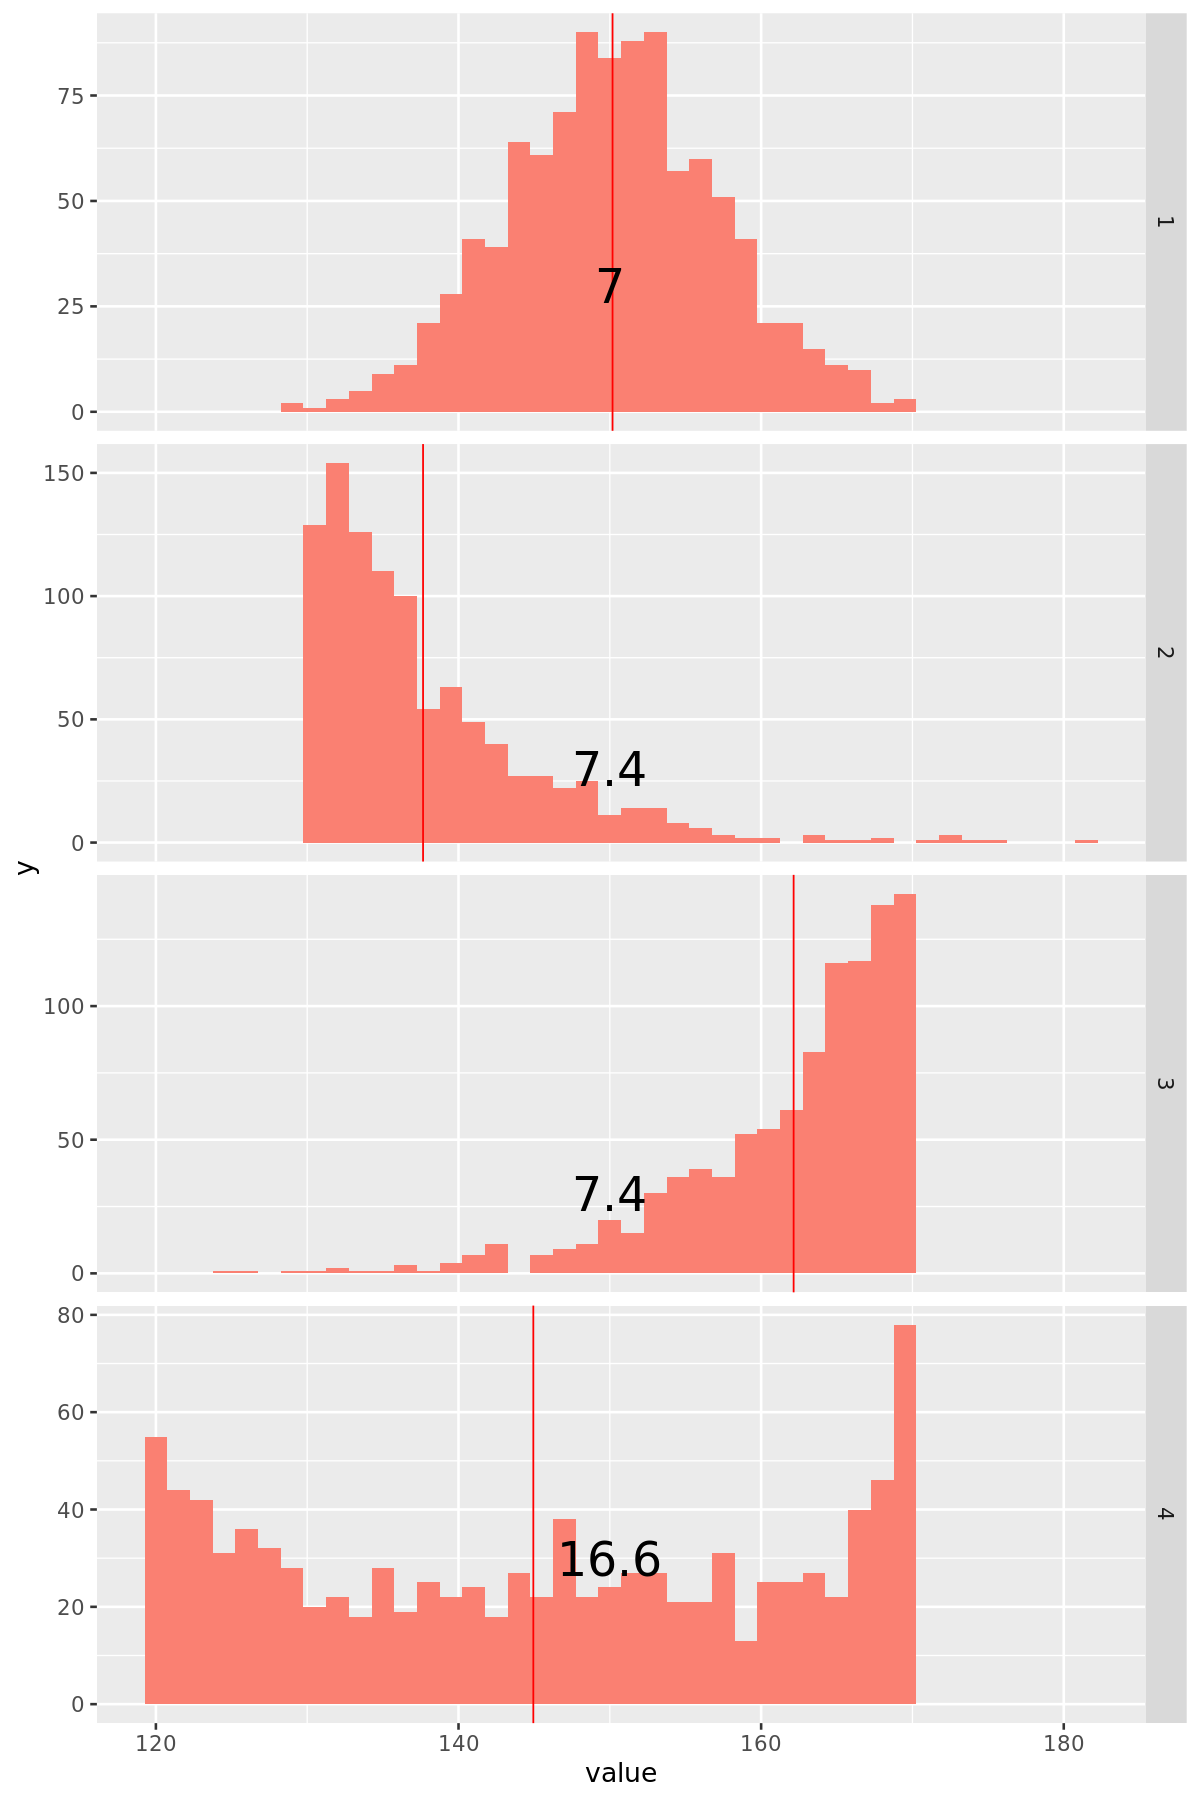

In [26]:
# set plot dimensions
options(repr.plot.width=10, repr.plot.height=15)

# histogram plots grouped by set with their mean and sd
df_text <- data.frame(set=c(1,2,3,4),
                      x=c(150,150,150,150),
                      y=c(30,30,30,30),
                      sd=round(var_stat$sd,digits=1))

data %>% 
group_by(set) %>%
ggplot(aes(x=value)) +
  geom_histogram(binwidth=1.5, fill="salmon") +
  geom_vline(data=var_stat, aes(xintercept=mean, group=set), color="red") +
  geom_text(data=df_text,aes(x=x,y=y,label=sd,group=set), size=10) +
  facet_grid(set ~., scale="free_y") + # allow different y-scales
  theme_grey(base_size = 16)

---
## Describing data using `gtsummary` package

We will use the `gtsummary` package, which is versatile library that can produce tables of summary statistics to describe the data. More details about the package can be found here: https://www.danieldsjoberg.com/gtsummary/

![gtsummary.png](images/gtsummary.png)

To demonstrate how categorical and quantitative data can be summarized with `gtsummary`, we'll look at a dataset of 200 patients at an ICU unit: https://vincentarelbundock.github.io/Rdatasets/doc/Stat2Data/ICU.html

The following categorical data were collected:
- `Age group`: (<50, 50-69, >=70)
- `Sex`: (Male/Female)
- `Survive`: (Yes/No)
- `Infection`: (Suspected/No)
- `Emergency Admission`: (Yes/No)

The following quantitative variables were collected:
- `Age`
- `Systolic BP`
- `Pulse Rate`

In [ ]:
library(tidyverse)

data_icu <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/icu.csv")

data_icu <- data_icu %>% 
            mutate("...1" = NULL,
                   ID = NULL,
                   Survive=as.factor(Survive),
                   Sex=as.factor(Sex),
                   Infection=as.factor(Infection),
                   Emergency=as.factor(Emergency), 
                   AgeGroup=as.factor(AgeGroup))

head(data_icu)

We will use the `tbl_summary` function from the `gtsummary` library. This function is highly versatile and can generate summary tables for categorical and quantitative data

By default:
- `categorical` variables are summarized by the count and proportion (in percentages)
- `quantitative` variables are summarized by the median and percentiles (25%, 75%)

The `tbl_summary` function produces a table in HTML format. We will define a convenience function `print_html` to display the output in the notebook

In [ ]:
# Local function to print HTML output for display within the notebook
print_html <- function(input) {

capture.output(input) %>% 
paste(collapse="") %>% 
IRdisplay::display_html()
    
}

Let us first look at how we can summarize the `categorical` variables in the ICU dataset. 
- We select the columns with categorical data and pass it to `tbl_summary`
- We pass the output from `tbl_summary` to `print_html` to display the table

In [ ]:
library(gtsummary)

# summarize categorical variables AgeGroup, Sex, Infection, Emergency, Survive
data_icu %>% 
select(AgeGroup, Sex, Infection, Emergency, Survive) %>% # select columns that are categorical (factors)
tbl_summary %>%
print_html

Next, let us summarize the quantitative variables
- We select the columns with quantitative data and pass it to `tbl_summary`
- We pass the output from `tbl_summary` to `print_html` to display the table

In [ ]:
# summarize quantitative variables Age, SysBP, Pulse
data_icu %>% 
select(Age, SysBP, Pulse) %>% # select only columns that are quantitative
tbl_summary %>%
print_html

The default summary statistics for quantitative variables are
- `median` (50th percentile)
- `25/75th percentiles`

We can override the default statistics by specifying the `statistic` option 

```
tbl_summary(statistic = variables ~ "summary statistics")
```

- Variables can be specified manually as a vector e.g. `c("Age", "SysBP", "Pulse")` or by using a helper function `all_continuous()`
- Summary statistics are specified by enclosing the statistical function (e.g. `mean`, `sd`, `IQR`) within curly braces `{}` as placeholders in the text

Here, we will specify that continuous variables will be `mean` and `sd`

In [ ]:
# summarize Age, SysBP, Pulse using mean and sd
data_icu %>% 
select(Age, SysBP, Pulse) %>%
tbl_summary(statistic = all_continuous() ~ "{mean} ({sd})") %>%
print_html

If we do not select the type of variables (i.e. categorical or quantitative), `tbl_summary` will create a table that summarizes both

In [ ]:
# default summary of both categorical and quantitative variables
data_icu %>% 
tbl_summary() %>%
print_html

Finally, we can compare the summary statistics grouped by a categorical variable of interest, by specifying the `by` option in `tbl_summary`
- `by = categorical variable`

As an example, we will compare the summary statistics of the dataset grouped by the `Survive` categorical variable

In [ ]:
# summarize dataset grouped by Survive category

data_icu %>% 
tbl_summary(by = Survive) %>%
print_html

---
## Exercise - Descriptive Stats

For this exercise, we will use the Framingham heart dataset

In [ ]:
library(tidyverse)

# load data
data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

# recap of what was done
data <- data %>% 
        rename(sex = male) %>%
        mutate(sex = as.factor(sex),
               age = as.integer(age),
               education = as.factor(education),
               currentSmoker = as.factor(currentSmoker),
               cigsPerDay = as.integer(cigsPerDay),
               BPMeds = as.factor(BPMeds),
               prevalentStroke = as.factor(prevalentStroke),
               prevalentHyp = as.factor(prevalentHyp),
               diabetes = as.factor(diabetes),
               totChol = as.integer(totChol),
               heartRate = as.integer(heartRate),
               TenYearCHD = as.factor(TenYearCHD)
               )

data <- data %>% 
        mutate(glucose = round(glucose/18, digits=1)) %>% # mg/dL to mmol/L
        mutate(totChol = round(totChol/39, digits=1))     # mg/dL to mmol/L

head(data)

### Part 1

Summarize the continuous variables using the `tbl_summary` function from the `gtsummary` library. Show the `mean` and `sd`

In [ ]:
# start here

In [ ]:
# solution

data %>% select(age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose) %>%
         tbl_summary(statistic = all_continuous() ~"{mean} ({sd})") %>%
         print_html()

### Part 2

Summarize the categorical variables using the `tbl_summary` function from the `gtsummary` library

In [ ]:
# start here

In [ ]:
# solution

data %>% select(sex,education,currentSmoker,BPMeds,prevalentStroke, prevalentHyp, diabetes, TenYearCHD) %>%
         tbl_summary() %>%
         print_html

### Part 3

Summarize both continuous and categorical variables and compare the summary statistics by the `TenYearCHD` category

In [ ]:
# start here

In [ ]:
# solution

data %>% tbl_summary(by=TenYearCHD) %>%
         print_html()